In [2]:
# Load embeddings from file
embeddings = []
with open ("Abstract_embeddings.txt", 'r') as embeddings_file:
    line = embeddings_file.readline()
    while line != "":
        embeddings.append([float(item) for item in line.split(",")[:-1]])
        line = embeddings_file.readline()

# Hierarchical clustering

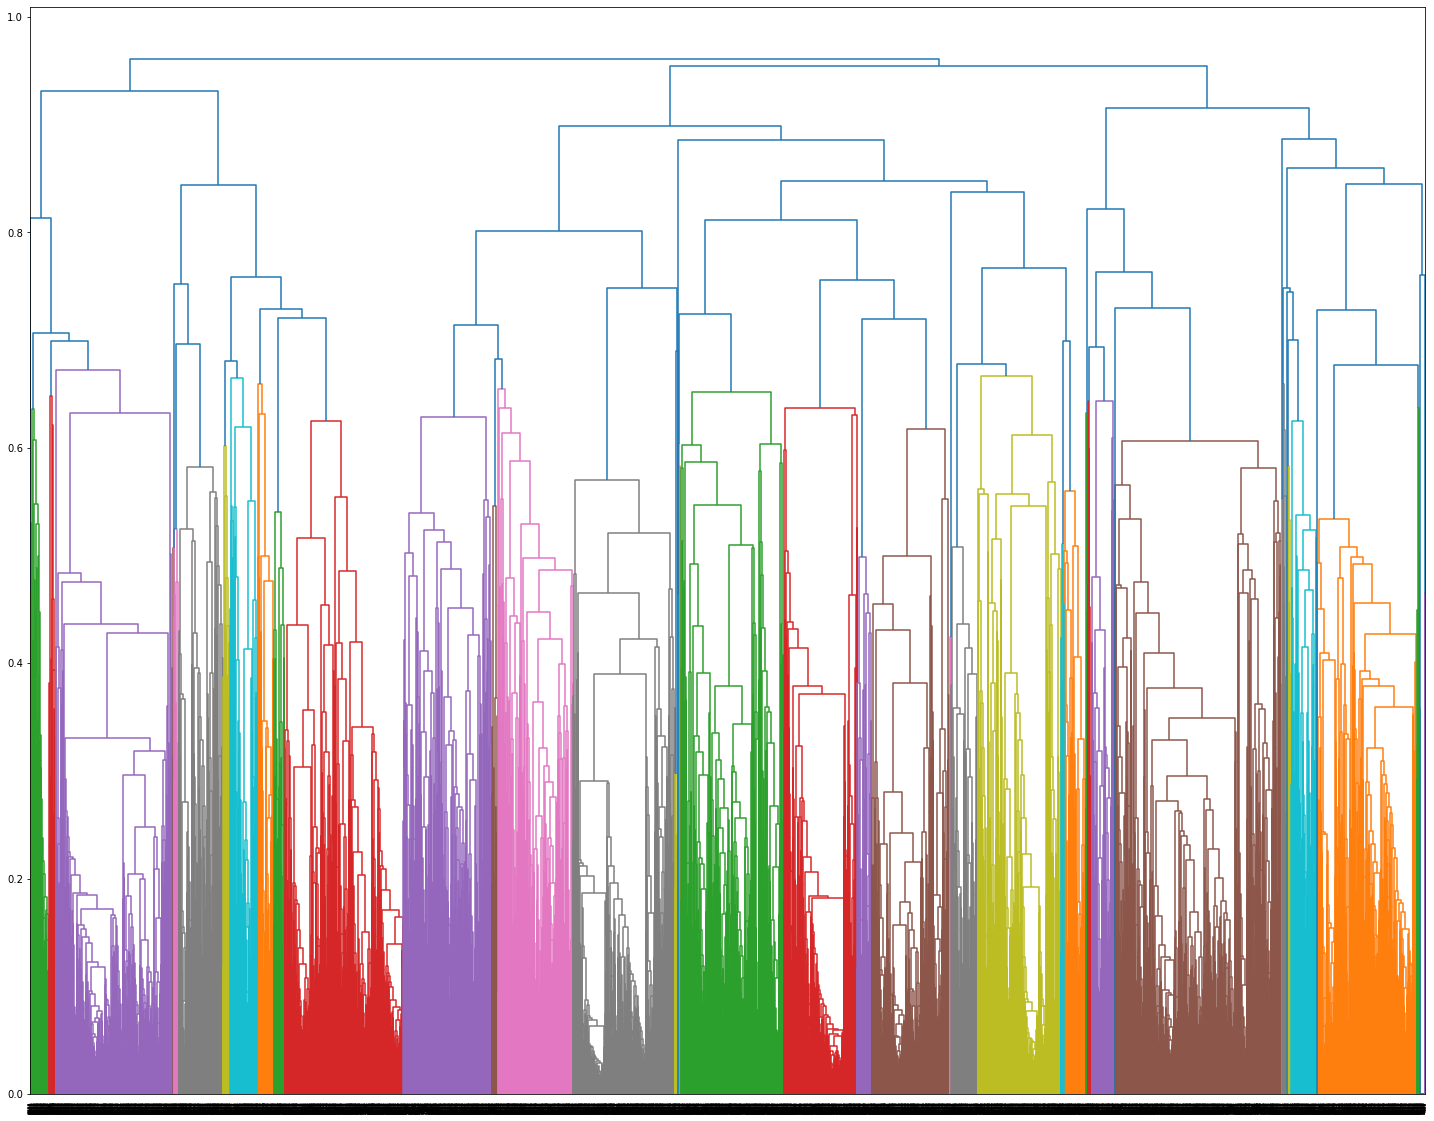

In [3]:
from scipy.cluster import  hierarchy
from matplotlib import pyplot as plt

linkage = hierarchy.linkage(embeddings,"average", metric="cosine")
fig = plt.figure(figsize=(25, 20))
dn = hierarchy.dendrogram(linkage)
plt.show()

In [4]:
from sklearn.metrics import silhouette_score
sil_coeffs = []
clusters_list = []
for n_cluster in range(2, 50):
    clusters = hierarchy.fcluster(linkage, n_cluster, criterion="maxclust")
    clusters_list.append(clusters)
    sil_coeff = silhouette_score(embeddings, clusters, metric='cosine')
    sil_coeffs.append(sil_coeff)
    number_of_clusters = len(set(clusters))
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(number_of_clusters, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.12313080261722295
For n_clusters=3, The Silhouette Coefficient is 0.15723821366461918
For n_clusters=4, The Silhouette Coefficient is 0.1817273133765526
For n_clusters=5, The Silhouette Coefficient is 0.20639579575448103
For n_clusters=6, The Silhouette Coefficient is 0.2295042633437365
For n_clusters=7, The Silhouette Coefficient is 0.22062221678956723
For n_clusters=8, The Silhouette Coefficient is 0.2052595316026499
For n_clusters=9, The Silhouette Coefficient is 0.20502764325742137
For n_clusters=10, The Silhouette Coefficient is 0.2204216126893231
For n_clusters=11, The Silhouette Coefficient is 0.22371035878132792
For n_clusters=12, The Silhouette Coefficient is 0.2254055409764052
For n_clusters=13, The Silhouette Coefficient is 0.21876526457986095
For n_clusters=14, The Silhouette Coefficient is 0.21591111114383607
For n_clusters=15, The Silhouette Coefficient is 0.2120346046360942
For n_clusters=16, The Silhouette Coefficient is

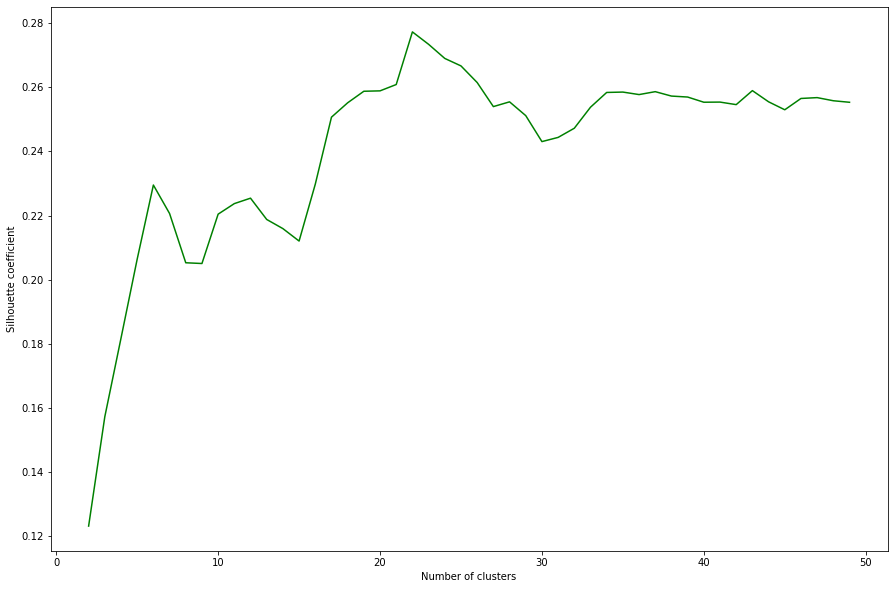

In [15]:
fig = plt.figure(figsize=(15, 10))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.plot(range(2, 50), sil_coeffs, 'g-')
plt.show()

In [12]:
clusters = clusters_list[sil_coeffs.index(max(sil_coeffs))]

In [13]:
# Indexing starts from zero, number of clusters starts from 2
print("Optimal number of clusters:", (sil_coeffs.index(max(sil_coeffs)) + 2))

Optimal number of clusters: 22
